In [1]:
#from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance
import matplotlib.pyplot as plt
from wfa.utils.get_new_images import get_new_image

%load_ext autoreload
%autoreload 2

from wfa.ml_logic.model import predict_new_images, load_data
from wfa.utils.image_viz import plot_classified_images, image_colormap, summary, landscape_changes
from wfa.utils.get_new_images import get_new_image, split_tiles, image_crop
from tensorflow.keras import models
#from wfa.ml_logic.registry import load_model

2022-12-14 08:37:00.938248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 08:37:03.140048: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 08:37:03.140093: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-14 08:37:10.222855: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
#model = load_model()
from tensorflow.keras.models import load_model
model = load_model('../models/Models_ResNet50')

2022-12-14 08:37:15.550635: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-14 08:37:15.550922: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-14 08:37:15.550984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (schneider-1091-luis-roberto-sant-anna-henriques): /proc/driver/nvidia/version does not exist
2022-12-14 08:37:15.566629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Classes
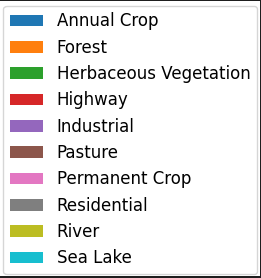

## Original

In [10]:
# address = '-24.319728, -50.447382' # Pablo
address = '-20.1391575,-44.1370295' # Brumadinho - Brazil
address = '33.052164, -97.335320' # Dallas
 
# address = '-1.7402492, 37.1191668' # Konza Techno City - Kenya
# address = '29.9298757, 31.6514432' # New Administrative Capital, Wedian - Egypt
# address = '29.8919282, 31.6706549' # New Administrative Capital, Wedian - Egypt
# address = '6.4278631, 3.4099658' # Eko Atlantic City – Nigeria
# address = '-8.7453179,-63.5724709' # Porto Velho - Brazil
# address = '-9.43671,-66.2837821' # Labrea - Brazil

year1 = 2018
year2 = 2020

scale = 1.

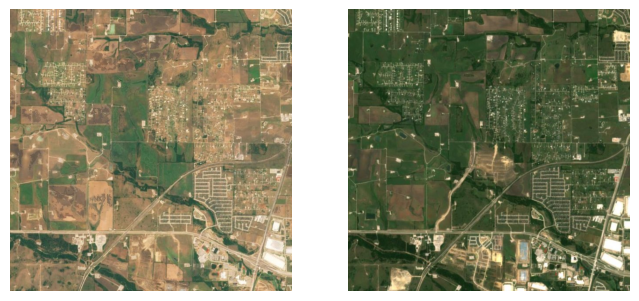

4/4 [==============================] - 2s 293ms/step


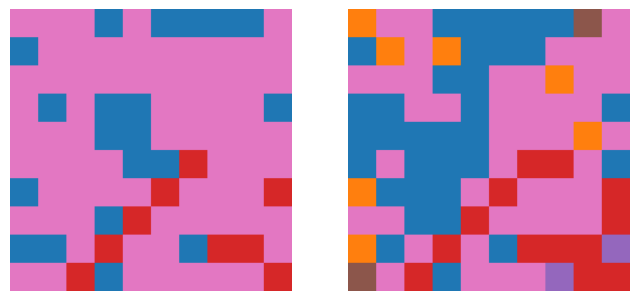

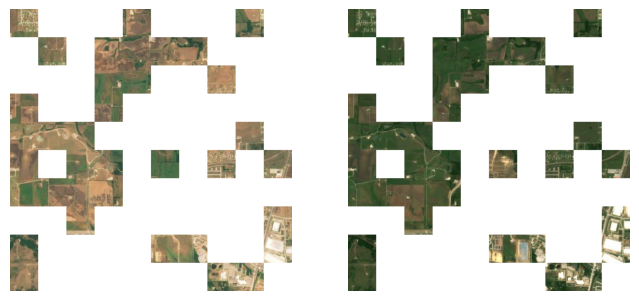

In [11]:
img1 = get_new_image(address, year1)
img2 = get_new_image(address, year2)

# size = int(img1.size[0] * scale)

# img1 = image_crop(img1.resize((size,size)))
# img2 = image_crop(img2.resize((size,size)))

fig, axs = plt.subplots(1, 2, figsize = (8, 8))
axs[0].imshow(img1)
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].axis('off')
plt.show()

X1 = split_tiles(img1)
X2 = split_tiles(img2)
pred1 = predict_new_images(model, X1);
pred2 = predict_new_images(model, X2);
plt1 = image_colormap(pred1)
plt2 = image_colormap(pred2)
fig, axs = plt.subplots(1, 2, figsize = (8, 8))
axs[0].imshow(plt1)
axs[0].axis('off')
axs[1].imshow(plt2)
axs[1].axis('off')
plt.show()

changes, summ = summary(pred1, pred2)
plt1 = landscape_changes(img1, changes)
plt2 = landscape_changes(img2, changes)
fig, axs = plt.subplots(1, 2, figsize = (8, 8))
axs[0].imshow(plt1)
axs[0].axis('off')
axs[1].imshow(plt2)
axs[1].axis('off')
plt.show()

## Sharpen

In [5]:
# plt1 = img1
# plt2 = img2

# plt1 = img1.filter(ImageFilter.SHARPEN)
# #plt2 = img2.filter(ImageFilter.SHARPEN)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

# X1 = split_tiles(plt1)
# X2 = split_tiles(plt2)
# pred1 = predict_new_images(model, X1);
# pred2 = predict_new_images(model, X2);
# plt1 = image_colormap(pred1)
# plt2 = image_colormap(pred2)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

# changes, summ = summary(pred1, pred2)
# plt1 = landscape_changes(img1, changes)
# plt2 = landscape_changes(img2, changes)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

## Detail

In [6]:
# plt1 = img1
# plt2 = img2

# plt1 = img1.filter(ImageFilter.DETAIL)
# # plt2 = img2.filter(ImageFilter.DETAIL)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

# X1 = split_tiles(plt1)
# X2 = split_tiles(plt2)
# pred1 = predict_new_images(model, X1);
# pred2 = predict_new_images(model, X2);
# plt1 = image_colormap(pred1)
# plt2 = image_colormap(pred2)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

# changes, summ = summary(pred1, pred2)
# plt1 = landscape_changes(img1, changes)
# plt2 = landscape_changes(img2, changes)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

## EDGE_ENHANCE

In [7]:
# plt1 = img1
# plt2 = img2

# plt1 = img1.filter(ImageFilter.EDGE_ENHANCE)
# # plt2 = img2.filter(ImageFilter.EDGE_ENHANCE)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

# X1 = split_tiles(plt1)
# X2 = split_tiles(plt2)
# pred1 = predict_new_images(model, X1);
# pred2 = predict_new_images(model, X2);
# plt1 = image_colormap(pred1)
# plt2 = image_colormap(pred2)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

# changes, summ = summary(pred1, pred2)
# plt1 = landscape_changes(img1, changes)
# plt2 = landscape_changes(img2, changes)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

## EDGE_ENHANCE_MORE

In [8]:
# plt1 = img1
# plt2 = img2

# plt1 = img1.filter(ImageFilter.EDGE_ENHANCE_MORE)
# #plt2 = img2.filter(ImageFilter.EDGE_ENHANCE_MORE)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

# X1 = split_tiles(plt1)
# X2 = split_tiles(plt2)
# pred1 = predict_new_images(model, X1);
# pred2 = predict_new_images(model, X2);
# plt1 = image_colormap(pred1)
# plt2 = image_colormap(pred2)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

# changes, summ = summary(pred1, pred2)
# plt1 = landscape_changes(img1, changes)
# plt2 = landscape_changes(img2, changes)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

## ImageEnhance + EDGE_ENHANCE

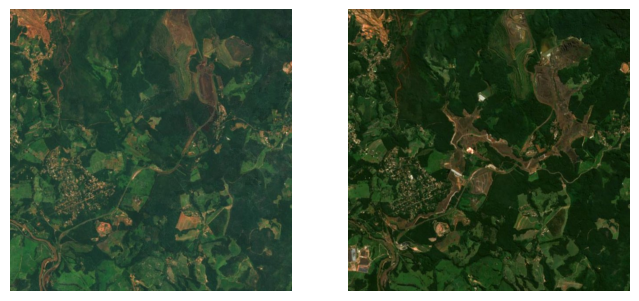

4/4 [==============================] - 1s 277ms/step


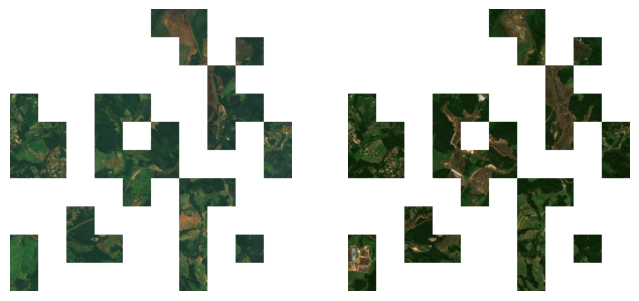

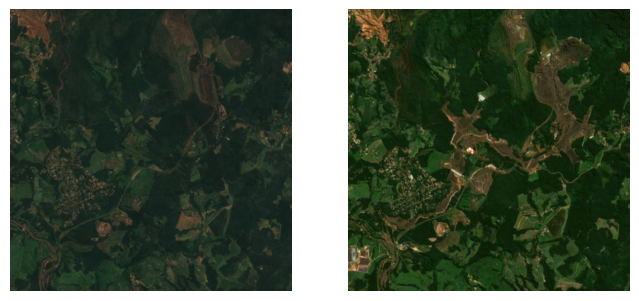

4/4 [==============================] - 2s 453ms/step


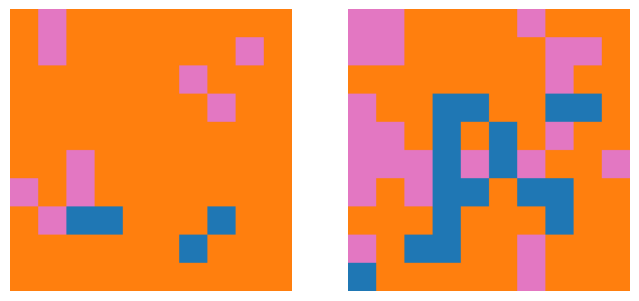

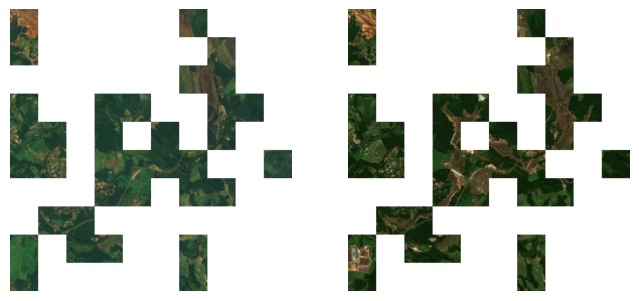

In [9]:
color_factor = 0.8
constrast_factor = 1.
brightness_factor = 0.65
sharpness_factor = 1.

# color_factor = 0.9
# constrast_factor = 1.
# brightness_factor = 0.7
# sharpness_factor = 1.5

# color_factor = 1.
# constrast_factor = 1.
# brightness_factor = 1.
# sharpness_factor = 1.

#######################################################
# Original Image
fig, axs = plt.subplots(1, 2, figsize = (8, 8))
axs[0].imshow(img1)
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].axis('off')
plt.show()

X1 = split_tiles(img1)
X2 = split_tiles(img2)
pred1 = predict_new_images(model, X1);
pred2 = predict_new_images(model, X2);
plt1 = image_colormap(pred1)
plt2 = image_colormap(pred2)
# fig, axs = plt.subplots(1, 2, figsize = (8, 8))
# axs[0].imshow(plt1)
# axs[0].axis('off')
# axs[1].imshow(plt2)
# axs[1].axis('off')
# plt.show()

changes, summ = summary(pred1, pred2)
plt1 = landscape_changes(img1, changes)
plt2 = landscape_changes(img2, changes)
fig, axs = plt.subplots(1, 2, figsize = (8, 8))
axs[0].imshow(plt1)
axs[0].axis('off')
axs[1].imshow(plt2)
axs[1].axis('off')
plt.show()

#######################################################

plt1 = img1
plt2 = img2

# plt1 = plt1.filter(ImageFilter.DETAIL)
# plt2 = plt2.filter(ImageFilter.DETAIL)

# plt1 = plt1.filter(ImageFilter.EDGE_ENHANCE)
# plt2 = plt2.filter(ImageFilter.EDGE_ENHANCE)

# plt1 = plt1.filter(ImageFilter.SHARPEN)
# plt2 = plt2.filter(ImageFilter.SHARPEN)

# Color
plt1 = ImageEnhance.Color(plt1)
#plt2 = ImageEnhance.Color(plt2)
plt1 = plt1.enhance(color_factor)
#plt2 = plt2.enhance(color_factor)

# Contrast
plt1 = ImageEnhance.Contrast(plt1)
#plt2 = ImageEnhance.Contrast(plt2)
plt1 = plt1.enhance(constrast_factor)
#plt2 = plt2.enhance(constrast_factor)

# Brightness
plt1 = ImageEnhance.Brightness(plt1)
#plt2 = ImageEnhance.Brightness(plt2)
plt1 = plt1.enhance(brightness_factor)
#plt2 = plt2.enhance(brightness_factor)

# Sharpness
plt1 = ImageEnhance.Sharpness(plt1)
#plt2 = ImageEnhance.Sharpness(plt2)
plt1 = plt1.enhance(sharpness_factor)
#plt2 = plt2.enhance(sharpness_factor)

# New Image
fig, axs = plt.subplots(1, 2, figsize = (8, 8))
axs[0].imshow(plt1)
axs[0].axis('off')
axs[1].imshow(plt2)
axs[1].axis('off')
plt.show()

X1 = split_tiles(plt1)
X2 = split_tiles(plt2)
pred1 = predict_new_images(model, X1);
pred2 = predict_new_images(model, X2);
plt1 = image_colormap(pred1)
plt2 = image_colormap(pred2)
fig, axs = plt.subplots(1, 2, figsize = (8, 8))
axs[0].imshow(plt1)
axs[0].axis('off')
axs[1].imshow(plt2)
axs[1].axis('off')
plt.show()

changes, summ = summary(pred1, pred2)
plt1 = landscape_changes(img1, changes)
plt2 = landscape_changes(img2, changes)
fig, axs = plt.subplots(1, 2, figsize = (8, 8))
axs[0].imshow(plt1)
axs[0].axis('off')
axs[1].imshow(plt2)
axs[1].axis('off')
plt.show()